In [1]:
from bs4 import BeautifulSoup
import pandas as pd


In [3]:
import urllib
url="http://stats.espncricinfo.com/ci/engine/player/28081.html?class=2;template=results;type=batting;view=innings"
html = urllib.request.urlopen(url).read()
bs=BeautifulSoup(html)

In [4]:
# ANother method
import requests
url = "http://stats.espncricinfo.com/ci/engine/player/28081.html?class=2;template=results;type=batting;view=innings"

# send request to download the data
response = requests.request("GET", url)

# parse the downloaded data
bs = BeautifulSoup(response.text, 'html.parser')


In [5]:
from collections import OrderedDict
temp_data=OrderedDict()
list_of_dict=[]
table_body=bs.find_all('tbody') #The <tbody> tag is used to group the body content in an HTML table

#The find_all method is one of the most common methods in BeautifulSoup. 

#It looks through a tag’s descendants and retrieves all descendants that match
#your filters. 
#table_body


In [6]:
rows = table_body[1].find_all('tr')   #The <tr> tag specifies a row in an HTML table.
for row in rows:
    cols=row.find_all('td')        # The <td> tag defines a standard cell in an HTML table. 
    cols=[x.text.strip() for x in cols]
    temp_data=OrderedDict()
    temp_data["Runs"]=cols[0]
    temp_data["Mins"]=cols[1]
    temp_data["BF"]=cols[2]
    temp_data["4s"]=cols[3]
    temp_data["6s"]=cols[4]
    temp_data["SR"]=cols[5]
    temp_data["POS"]=cols[6]
    temp_data["Dismissal"]=cols[7]
    temp_data["Inns"]=cols[8]
    temp_data["Opposition"]=cols[10]
    temp_data["Ground"]	=cols[11]
    temp_data["Date"]=cols[12]
    list_of_dict.append(temp_data)   

In [5]:
type(temp_data)

collections.OrderedDict

# Dictionary

In [6]:
print("This is a Dict:\n") 
d = {} 
d['a'] = 1
d['b'] = 2
d['c'] = 3
d['d'] = 4
  

print("\nThis is an Ordered Dict:\n") 
od = OrderedDict() 
od['a'] = 1
od['b'] = 2
od['c'] = 3
od['d'] = 4
  
   
print(d)
print(od)

This is a Dict:


This is an Ordered Dict:

{'a': 1, 'b': 2, 'c': 3, 'd': 4}
OrderedDict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])


In [7]:
df=pd.DataFrame(list_of_dict)

In [8]:
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7*,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005


In [9]:
#Data Analysis
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7*,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,99,61,3,2,91.80,6,not out,1,v West Indies,Manchester,27 Jun 2019
346,42*,54,31,4,1,135.48,6,not out,2,v England,Birmingham,30 Jun 2019
347,35,52,33,4,0,106.06,6,caught,1,v Bangladesh,Birmingham,2 Jul 2019
348,DNB,-,-,-,-,-,-,-,2,v Sri Lanka,Leeds,6 Jul 2019


In [9]:
df.shape

(350, 12)

In [10]:
def formatRuns(runs):
    runs = runs.replace("*",'')
    try:
        return int(runs)
    except:
        return 0

In [11]:
df['Runs'] = df['Runs'].apply(lambda runs: formatRuns(runs))

In [12]:
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004
2,7,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005


In [13]:
def formatDate(date):
    year = date.split(" ")[-1]
    return year

In [14]:
df['Year'] = df['Date'].apply(lambda date: formatDate(date))

In [15]:
df

,Runs,Mins,BF,4s,6s,SR,POS,Dismissal,Inns,Opposition,Ground,Date,Year
0,0,1,1,0,0,0.00,7,run out,1,v Bangladesh,Chattogram,23 Dec 2004,2004
1,12,16,11,2,0,109.09,7,caught,2,v Bangladesh,Dhaka,26 Dec 2004,2004
2,7,2,2,0,1,350.00,7,not out,1,v Bangladesh,Dhaka,27 Dec 2004,2004
3,3,8,7,0,0,42.85,7,caught,1,v Pakistan,Kochi,2 Apr 2005,2005
4,148,155,123,15,4,120.32,3,caught,1,v Pakistan,Visakhapatnam,5 Apr 2005,2005
5,28,36,24,5,0,116.66,3,caught,2,v Pakistan,Jamshedpur,9 Apr 2005,2005
6,47,90,64,4,1,73.43,3,caught,1,v Pakistan,Ahmedabad,12 Apr 2005,2005
7,11,20,16,1,0,68.75,3,caught,1,v Pakistan,Kanpur,15 Apr 2005,2005
8,24,71,38,2,0,63.15,3,caught,2,v Pakistan,Delhi,17 Apr 2005,2005
9,2,17,7,0,0,28.57,2,bowled,1,v Sri Lanka,Dambulla,30 Jul 2005,2005


In [16]:
res = df.groupby(['Year']).agg({'Runs': 'sum','Opposition':'count'})
res

,Runs,Opposition
Year,,
2004,19,3
2005,895,27
2006,821,29
2007,1103,37
2008,1097,29
2009,1198,29
2010,600,18
2011,764,24
2012,524,16


In [17]:
res=res.rename(columns = {'Opposition':'Matches'})
res

,Runs,Matches
Year,,
2004,19,3
2005,895,27
2006,821,29
2007,1103,37
2008,1097,29
2009,1198,29
2010,600,18
2011,764,24
2012,524,16


In [18]:
res.reset_index(level=0, inplace=True)
res

,Year,Runs,Matches
0,2004,19,3
1,2005,895,27
2,2006,821,29
3,2007,1103,37
4,2008,1097,29
5,2009,1198,29
6,2010,600,18
7,2011,764,24
8,2012,524,16
9,2013,753,26


In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
res.plot(kind='bar',x="Year",y='Runs',color='Blue')
plt.savefig("file.jpg",dpi=200)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

<Figure size 1332x756 with 0 Axes>

In [21]:
# lINEAR REGRESSION


In [22]:
res.shape

(16, 3)

In [23]:
x = res.iloc[:,[2]].values

In [24]:
x

array([[ 3],
       [27],
       [29],
       [37],
       [29],
       [29],
       [18],
       [24],
       [16],
       [26],
       [12],
       [20],
       [13],
       [29],
       [20],
       [18]], dtype=int64)

In [25]:
y = res.iloc[:,1].values

In [26]:
y

array([  19,  895,  821, 1103, 1097, 1198,  600,  764,  524,  753,  418,
        640,  278,  788,  275,  600], dtype=int64)

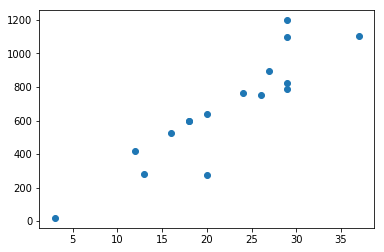

In [27]:
plt.scatter(x,y)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
model.predict([[18]])

array([539.52399077])

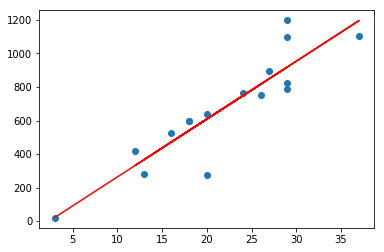

In [30]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='r')

In [31]:
y_pred = model.predict(x)

In [32]:
y_pred

array([  21.63298731,  850.25859285,  919.31072664, 1195.51926182,
        919.31072664,  919.31072664,  539.52399077,  746.68039216,
        470.47185698,  815.73252595,  332.36758939,  608.57612457,
        366.89365629,  919.31072664,  608.57612457,  539.52399077])

In [33]:
y

array([  19,  895,  821, 1103, 1097, 1198,  600,  764,  524,  753,  418,
        640,  278,  788,  275,  600], dtype=int64)

In [34]:
model.score(x,y)

0.8173831541094749